In [37]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise sheet 2

## Task 1

In [38]:
def sin(x):
    return np.sin(x)


In [39]:
def f(pts, vals):
    """
    Calculate coefficients of Newton interpol by
    divided differences.

    input:
       pts ... list of points
       val ... list of values

    output:
       divided differences
    """

    n = len(pts)-1
    dd = np.asarray(vals)
    for i in range(n):
        for j in range(n, i, -1):
            if pts[j] == pts[j - i - 1]:
                dd[j] = np.cos(pts[j])
            else:
                # print ("i =",i, ", j =",j)
                dd[j] = (dd[j]-dd[j-1]) / (pts[j]-pts[j-i-1])
    return dd


Hermite: $p(x) := f(x_{0}) + \sum_{i = 1}^{n}f[x_{0}, ..., x_{i}] \prod_{j=0}^{i - 1}(x-x_{j})$

In [40]:
def hermite(pts_, val_, x):
    fs = f(pts_, val_) # divided differences
    sum_ = 0
    for i in range(1, len(pts_)):
        fi = fs[i]
        prod = 1
        for j in range(0, i):
            prod *= (x - pts_[j])
        sum_ += fi * prod
    return val_[0] + sum_

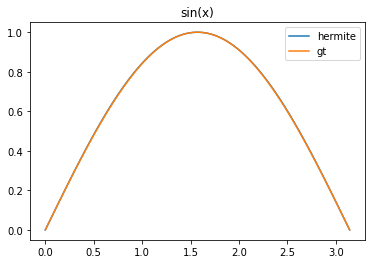

In [41]:
pts = np.array([0, 0, np.pi / 2, np.pi / 2, np.pi, np.pi])
val = sin(pts)

x = np.linspace(0, np.pi, 100)
y = hermite(pts, val, x)

plt.plot(x, y, label="hermite")

y = np.sin(x)
plt.plot(x, y, label="gt")

plt.title("sin(x)")
plt.legend()
plt.show()

implementation of the atkin neville scheme

In [42]:
def aitken_neville(x,vals,x_bar):
    n = len(x)-1
    for m in range(1,n):
        for j in range(0,n-m):
            vals[j] = ((x_bar-x[j])*vals[j+1] - (x_bar-x[j+m])*vals[j])/(x[j+m]-x[j])
    return vals[0]

$D$ approximates the derivative of a function.

In [43]:
def D(x_, h):
    # print(np.around(pts, 2))
    # print(np.around(np.sin(pts), 2))
    return (hermite(pts, np.sin(pts), x_ + h) - hermite(pts, np.sin(pts), x_)) / h

Compute the error between the approximated derivative and the real derivative. Since we can not compute
the derivative $D$ of $f$ (division by $h = 0$), we use small values of $h$ and approximate the derivative using the atkin neville scheme.
Then we can extrapolate the derivative by looking at $h = 0$.

In [44]:
def derivative(q_, x_):
    h = [q_**i for i in range(0,20)]
    ds = [D(x_,i) for i in h] # compute interpolation y values
    res = aitken_neville(h, ds, 0) # extrapolate at position 0
    print("hermite: ", round(x_, 2), "->",  round(res, 2))
    print("gt:      ", round(x_, 2), "->",  round(np.cos(x), 2))

Now we need to test whether $f'(x_{i}) = p'(x_{i})$

In [45]:
x = 0
q = 0.5
derivative(q, x)

x = np.pi / 2
derivative(q, x)

x = np.pi
derivative(q, x)

hermite:  0 -> 1.0
gt:       0 -> 1.0
hermite:  1.57 -> 0.0
gt:       1.57 -> 0.0
hermite:  3.14 -> -1.0
gt:       3.14 -> -1.0


and $f(x_{i}) = p(x_{i})$

In [46]:
x = 0
y = hermite(pts,np.sin(pts), x)
print("hermite: ", round(x, 2), "->", round(y, 2))

y = np.sin(x)
print("gt     : ", round(x, 2), "->", round(y, 2))


x = np.pi / 2
y = hermite(pts,np.sin(pts), x)
print("hermite: ", round(x, 2), "->", round(y, 2))

y = np.sin(x)
print("gt     : ", round(x, 2), "->", round(y, 2))


x = np.pi
y = hermite(pts,np.sin(pts), x)
print("hermite: ", round(x, 2), "->", round(y, 2))

y = np.sin(x)
print("gt     : ", round(x, 2), "->", round(y, 2))

hermite:  0 -> 0.0
gt     :  0 -> 0.0
hermite:  1.57 -> 1.0
gt     :  1.57 -> 1.0
hermite:  3.14 -> 0.0
gt     :  3.14 -> 0.0


## Task 2

In [47]:
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt

mean squared error:  2.170918779946823e-13


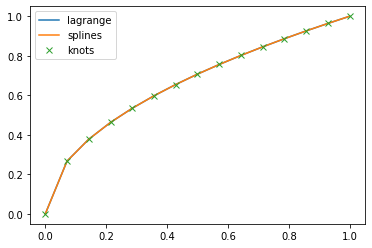

In [48]:
def f1(x): return np.sqrt(x)
def f2(x): return np.arctan(10 * x)
def cebyshev(x): return 5 * np.cos((x+0.5)*np.pi/len(x))
def mean_sq_error(d1, d2): return round(np.mean((d1 - d2)**2), 3)
x = np.linspace(0, 1, 15)
y = f1(x)

# compute lagrange interpolation
poly = interpolate.lagrange(x, y)
lagrange = poly(x)
plt.plot(x, poly(x), label="lagrange")

# compute spline interpolation
tck = interpolate.splrep(x, y)
splines = interpolate.splev(x, tck)
plt.plot(x, splines, label="splines")

# plot knots
plt.plot(x, y, "x", label="knots")

print("mean squared error: ", mean_sq_error(lagrange, splines))

plt.legend()
plt.show()
